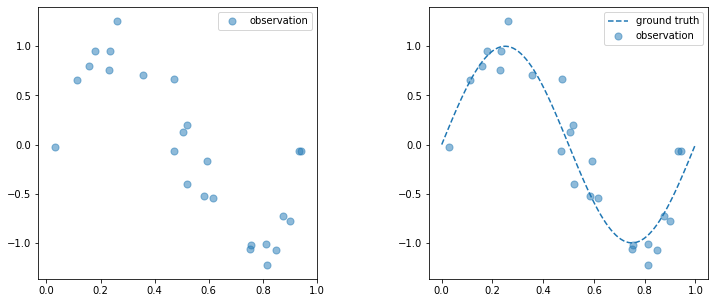

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import BayesianRidge
%matplotlib inline

def func(x): 
    return np.sin(2*np.pi*x)


# Generate sinusoidal data with noise
size = 25

x_data = np.random.uniform(0., 1., size)
y_data = func(x_data) + np.random.normal(loc=0., scale=0.2, size=size)

x_trial = np.linspace(0., 1., 100)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
plt.scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
plt.plot(x_trial,func(x_trial),'--', label="ground truth" )
plt.legend(loc='best')
plt.show()

print(np.round(x_trial,decimals=2) )


In [8]:
## Model 1: y = w0 + w1 x 
n_order = 1
X1_data = np.vander(x_data, n_order + 1, increasing=True)

X1_trial = np.vander(x_trial, n_order + 1, increasing=True)

# print('vander:', X1_data)
# col_tmp = x_data.T
# X1_data = np.stack( (np.ones((size)), col_tmp),axis=1)
# print('col:', X1_data)


## Model 2: y = w0 + w1 x + w2 x^2
n_order = 2
X2_data = np.vander(x_data, n_order + 1, increasing=True)
X2_trial = np.vander(x_trial, n_order + 1, increasing=True)

# col_tmp = x_data.T
# X2_data = np.stack( (np.ones((size)), col_tmp, col_tmp**2),axis=1)



## Model 3 : y = w0 + w1 x + w2 x^2 + w3 x^3 
n_order = 3
X3_data = np.vander(x_data, n_order + 1, increasing=True)
X3_trial = np.vander(x_trial, n_order + 1, increasing=True)

# col_tmp = x_data.T
# X3_data = np.stack( (np.ones((size)), col_tmp, col_tmp**2), col_tmp**3 ,axis=1)



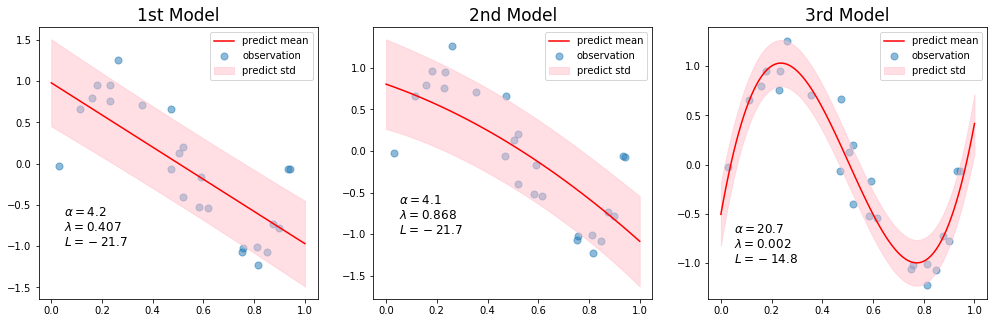

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))

reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

# Bayesian ridge regression with different initial value pairs
init = [1 / np.var(y_data), 1.]  # Default values
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X1_data, y_data)

ymean, ystd = reg.predict(X1_trial, return_std=True)

axes[0].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[0].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")
axes[0].plot(x_trial, ymean, color="red", label="predict mean")
axes[0].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[0].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[0].text(0.05, -1.0, text, fontsize=12)
axes[0].set_title('1st Model', fontsize=17)


init = [1, 0.001]
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X2_data, y_data)
ymean, ystd = reg.predict(X2_trial, return_std=True)

axes[1].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[1].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")
axes[1].plot(x_trial, ymean, color="red", label="predict mean")
axes[1].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[1].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[1].text(0.05, -1.0, text, fontsize=12)
axes[1].set_title('2nd Model', fontsize=17)


init = [0.5, 0.001]
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X3_data, y_data)                                        
ymean, ystd = reg.predict(X3_trial, return_std=True)            

axes[2].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[2].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")
axes[2].plot(x_trial, ymean, color="red", label="predict mean")
axes[2].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[2].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[2].text(0.05, -1.0, text, fontsize=12)
axes[2].set_title('3rd Model', fontsize=17)



plt.show()





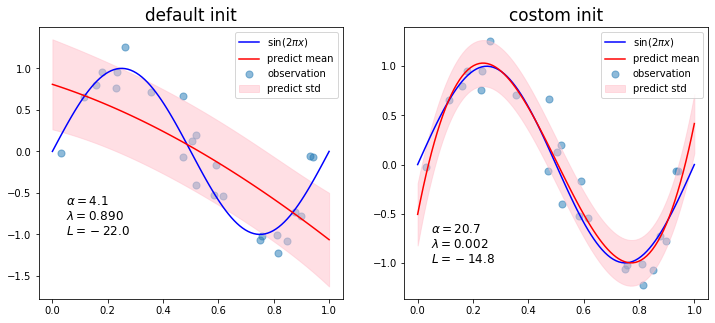

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

# Bayesian ridge regression with different initial value pairs
init = [1 / np.var(y_data), 1.]  # Default values
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X3_data, y_data)

BayesianRidge(tol=1e-3, fit_intercept=False, compute_score=True).fit(X3_data, y_data)

ymean, ystd = reg.predict(X3_trial, return_std=True)

axes[0].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[0].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")

axes[0].plot(x_trial, ymean, color="red", label="predict mean")
axes[0].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[0].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[0].text(0.05, -1.0, text, fontsize=12)
axes[0].set_title('default init', fontsize=17)



init = [1., 1e-3]
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(X3_data, y_data)
ymean, ystd = reg.predict(X3_trial, return_std=True)

axes[1].scatter(x_data, y_data, s=50, alpha=0.5, label="observation")
axes[1].plot(x_trial, func(x_trial), color="blue", label="sin($2\\pi x$)")

axes[1].plot(x_trial, ymean, color="red", label="predict mean")
axes[1].fill_between(x_trial, ymean-ystd, ymean+ystd, color="pink", alpha=0.5, label="predict std")
axes[1].legend()
text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format( reg.alpha_, reg.lambda_, reg.scores_[-1])
axes[1].text(0.05, -1.0, text, fontsize=12)
axes[1].set_title('costom init', fontsize=17)



plt.show()





In [16]:
## simple linear regression
##  https://machinelearningmastery.com/implement-simple-linear-regression-scratch-python/


# Standalone simple linear regression example
from math import sqrt
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)
 
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
    test_set = list()
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    predicted = algorithm(dataset, test_set)
#     print(predicted)
    actual = [row[-1] for row in dataset]
    rmse = rmse_metric(actual, predicted)
    return rmse
 
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[1] for row in dataset]
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
 
# Simple linear regression algorithm
def simple_linear_regression(train, test):
    predictions = list()
    b0, b1 = coefficients(train)
    for row in test:
        yhat = b0 + b1 * row[0]
        predictions.append(yhat)
    return predictions
 
    
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

w0, w1 = coefficients(dataset)
print ('coefficients:', 'w0=',np.round(w0, decimals=3),'   w1:=', w1)



RMSE: 0.693
coefficients: w0= 0.4    w1:= 0.8


coefficients: w0= 0.40000000000000013    w1:= 0.7999999999999999


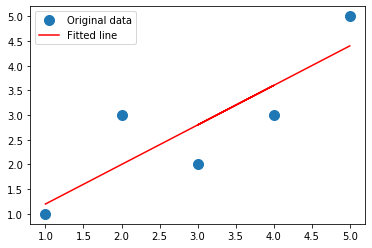

In [13]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]

x = [] ; y=[]
for i in range(len(dataset)):
    x.append(dataset[i][0])
    y.append(dataset[i][1])
    
A = np.vstack([x, np.ones(len(x))]).T

# simple linear regression 
nw1, nw0 = np.linalg.lstsq(A, y, rcond=None)[0]
print ('coefficients:', 'w0=',nw0,'   w1:=', nw1)


plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, nw1*np.asarray(x)+ nw0, 'r', label='Fitted line')
plt.legend()
plt.show()